In [1]:
import cv2, sys
import numpy as np

import matplotlib.pyplot as plt

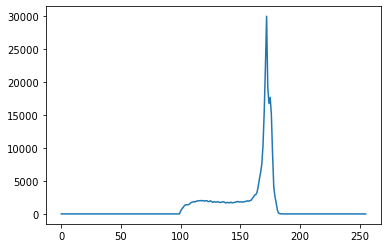

In [3]:
src = cv2.imread('../ch_4/puppy_shrink.png', 0)

cv2.imshow('src', src)

src_hist = cv2.calcHist([src], [0], None, [256], [0, 256])

plt.plot(src_hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

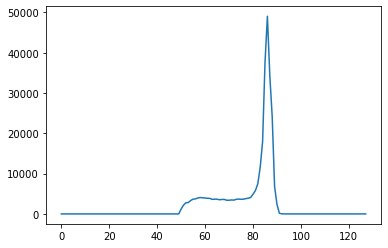

In [4]:
src = cv2.imread('../ch_4/puppy_shrink.png', 0)

cv2.imshow('src', src)

src_hist = cv2.calcHist([src], [0], None, [128], [0, 256])

plt.plot(src_hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
# 히스토그램 스트레칭

src = cv2.imread('../ch_4/puppy_shrink.png', 0)
smin, smax, _, _ = cv2.minMaxLoc(src)
print(smin, smax)

dst_norm = np.clip(255*(src - smin)/(smax - smin) + 0., 0, 255).astype(np.uint8)           # 클리핑 사용, 정규화

dst_norm_cv = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)                 # 스트레칭 다른 방법

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_norm_cv', dst_norm_cv)

# dst_norm = cv2.calcHist([src], [0], None, [256], [0, 256])

# plt.plot(src_hist)
# plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

100.0 184.0


In [7]:
## 평탄화

src = cv2.imread('../ch_4/puppy_shrink.png', 0)

dst_equal = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('dst_equal', dst_equal)

# dst_norm = cv2.calcHist([src], [0], None, [256], [0, 256])

# plt.plot(src_hist)
# plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

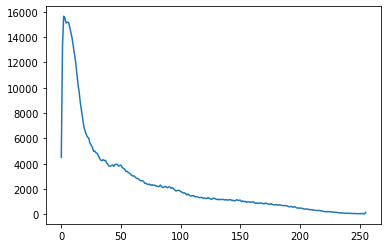

In [11]:
src = cv2.imread('../ch_4/manjang.jpg', 0)

dst_norm_cv = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)                 # 스트레칭 다른 방법
dst_equal = cv2.equalizeHist(src)

src_hist = cv2.calcHist([src], [0], None, [256], [0, 256])

cv2.imshow('src', src)
cv2.imshow('dst_norm_cv', dst_norm_cv)
cv2.imshow('dst_equal', dst_equal)

plt.plot(src_hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

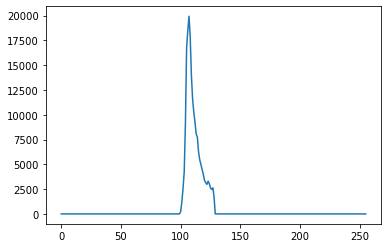

In [33]:
src = cv2.imread('../Ch_3_Basic_img_proc/fig/flowers.jpg', 0)

src_sh =  cv2.normalize(src, None, 100, 128, cv2.NORM_MINMAX, -1)           # 대역폭 줄이기
src_sh_1 = np.clip(src*0.3 + 100., 0, 255).astype(np.uint8)

src_norm = cv2.normalize(src_sh, None, 0, 255, cv2.NORM_MINMAX, -1)
src_equal = cv2.equalizeHist(src_sh)


src_hist = cv2.calcHist([src_sh], [0], None, [256], [0, 256])

cv2.imshow('src', src)
cv2.imshow('src_sh_1', src_sh_1)
cv2.imshow('src_sh', src_sh)
cv2.imshow('src_norm', src_norm)
cv2.imshow('src_equal', src_equal)

plt.plot(src_hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

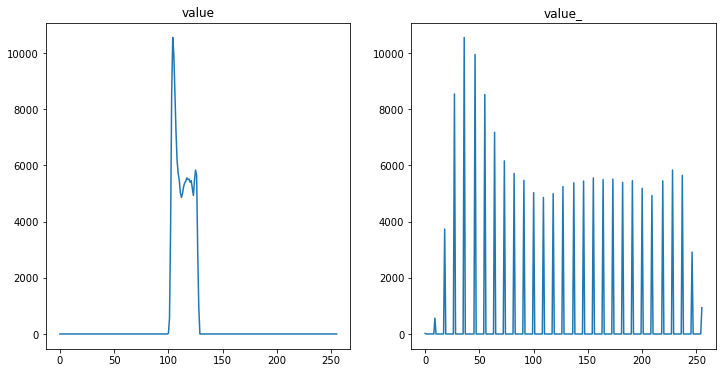

In [4]:
img = cv2.imread('../ch_4/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_2)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(img_hsv)
v_ = cv2.normalize(v, None, 100, 128, cv2.NORM_MINMAX, -1)
img_hsv_ = cv2.merge([h, s, v_])

# plt.figure(figsize = (12, 6))
# plt.subplot(121), plt.plot(v), plt.axis('off'), plt.title('v')
# plt.subplot(122), plt.plot(v_), plt.axis('off'), plt.title('v_')
# plt.show()

img_hsv_1 = cv2.cvtColor(img_hsv_, cv2.COLOR_HSV2BGR)

v_norm = cv2.normalize(v_, None, 0, 255, cv2.NORM_MINMAX, -1)
img_norm = cv2.merge([h, s, v_norm])
img_norm_ = cv2.cvtColor(img_norm, cv2.COLOR_HSV2BGR)

v_equal = cv2.equalizeHist(v_)
img_equal = cv2.merge([h, s, v_equal])
img_equal_ = cv2.cvtColor(img_equal, cv2.COLOR_HSV2BGR)

cv2.imshow('img', img)
cv2.imshow('img_hsv', img_hsv_1)
cv2.imshow('img_norm', img_norm_)
cv2.imshow('img_equal', img_equal_)

hist_v = cv2.calcHist([img_hsv_], [2], None, [256], [0, 256])
hist_v_ = cv2.calcHist([img_norm], [2], None, [256], [0, 256])

fig, axes = plt.subplots(1, 2, figsize = (12, 6))
axes[0].plot(hist_v), axes[0].set_title('value')
axes[1].plot(hist_v_), axes[1].set_title('value_')
plt.show()


cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
img = cv2.imread('../ch_4/manjang.jpg', cv2.IMREAD_REDUCED_COLOR_2)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(img_hsv)

norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX, -1)
equal = cv2.equalizeHist(v)

img_Gaussian = cv2.GaussianBlur(equal, (0, 0), 2)

img_norm = cv2.merge((h, s, norm))
img_equal = cv2.merge((h, s, equal))
img_Gaussian = cv2.merge((h, s, img_Gaussian))

img_norm = cv2.cvtColor(img_norm, cv2.COLOR_HSV2BGR)
img_equal = cv2.cvtColor(img_equal, cv2.COLOR_HSV2BGR)
img_Gaussian = cv2.cvtColor(img_Gaussian, cv2.COLOR_HSV2BGR)

cv2.imshow('img', img)
cv2.imshow('img_norm', img_norm)
cv2.imshow('img_equal', img_equal)
cv2.imshow('img_Gaussian', img_Gaussian)

cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
cap = cv2.VideoCapture(0)

cv2.namedWindow('img', cv2.WINDOW_AUTOSIZE)

while True:
    ret, frame = cap.read()
    
#     frame_flip = cv2.flip(frame, 1)
    
    cv2.imshow('img', frame)
    
    key = cv2.waitKey(30)
    
    if key == ord('i'):
        while True:
            ret, frame = cap.read()
            edge = cv2.Canny(frame, 50, 150)
            cv2.imshow('img', edge)
            if cv2.waitKey(30) == ord('i'):
                break
                
    elif key == ord('f'):
        while True:
            ret, frame = cap.read()
            flip = cv2.flip(frame, 1)
            cv2.imshow('img', flip)
            if cv2.waitKey(30) == ord('f'):
                break

        
    if key == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [80]:
## 동영상 편집은 이런 방식으로 하는 것이 좋다.

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('cam open failed')
    sys.exit()

f_flag = False
i_flag = False

while True:
    ret, frame = cap.read()
    if ret is None:
        print('Video read failed')
        break

    if f_flag:
        frame = cv2.flip(frame, 1)
    if i_flag:
        frame = cv2.Canny(frame, 50, 150)

    cv2.imshow('image', frame)

    kw = cv2.waitKey(20)
    if kw==27:
        break
    elif kw==ord('f'):
        f_flag = not f_flag
    elif kw==ord('i'):
        i_flag = not i_flag


cap.release()
cv2.destroyAllWindows()


In [79]:
cap1 = cv2.VideoCapture(0)

if not cap1.isOpened():
    print('cam read failed')
    sys.exit()
    


while True:
    
    ret, frame = cap1.read()
    
    cv2.imshow('img', frame)
    
    if not ret:
        print('video read failed')
        break
        
    keys = cv2.waitKey(30)
    
    if keys == ord('i'):
        edge = cv2.Canny(frame, 50, 150)
        cv2.imshow('img', edge)
        
    
        
    if keys == 27:
        break
        

    
cap1.release()
cv2.destroyAllWindows()

In [12]:
src = cv2.imread('../ch_4/palette.png')
src_dark = cv2.imread('../ch_4/palette_dark.png')

dst_bgr = cv2.inRange(src, (0, 150, 0), (100, 255, 100))           # 특정 색 뽑아내기
dst_bgr_dark = cv2.inRange(src_dark, (0, 150, 0), (50, 255, 50))           # bgr의 경우 명도가 포함되어 있다


if src is None:
    print('failed')
    sys.exit()
    
cv2.imshow('src', src)
cv2.imshow('src_dark', src_dark)
cv2.imshow('dst_bgr', dst_bgr)
cv2.imshow('dst_bgr_dark', dst_bgr_dark)

cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
src = cv2.imread('../ch_4/palette.png')
src_dark = cv2.imread('../ch_4/palette_dark.png')

if src is None:
    print('imaeg load failed')
    sys.exit()

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
src_hsv_dark = cv2.cvtColor(src_dark, cv2.COLOR_BGR2HSV)

dst_hsv = cv2.inRange(src_hsv, (110, 250, 200), (130, 255, 255))
dst_hsv_dk = cv2.inRange(src_hsv_dark, (110, 250, 200), (130, 255, 255))

cv2.imshow('src', src)
cv2.imshow('img', dst_hsv)
cv2.imshow('img1', dst_hsv_dk)

cv2.waitKey()
cv2.destroyAllWindows()

In [42]:
## 트랙바를 이용하여 특정 색 찾아내기

def call_track(pos):
    hmin = cv2.getTrackbarPos('H_min', 'src')
    hmax = cv2.getTrackbarPos('H_max', 'src')
    
    dst = cv2.inRange(src_hsv, (hmin, 150, 150), (hmax, 255, 255))
    cv2.imshow('src', dst)

src = cv2.imread('../ch_4/palette_dark.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.namedWindow('src')
cv2.createTrackbar('H_min', 'src', 50, 179, call_track)
cv2.createTrackbar('H_max', 'src', 80, 179, call_track)

cv2.imshow('src', src)
cv2.imshow('src1', src)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [60]:
def call_track_1(pos):
    hmin = cv2.getTrackbarPos('H_min', 'src')
    hmax = cv2.getTrackbarPos('H_max', 'src')     # 50과 80
    
    dst = cv2.inRange(src_hsv, (hmin, 100, 100), (hmax, 255, 255))
    cv2.imshow('src', dst)

src = cv2.imread('../ch_4/green/chromakey.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.namedWindow('src')
cv2.createTrackbar('H_min', 'src', 50, 179, call_track_1)
cv2.createTrackbar('H_max', 'src', 80, 179, call_track_1)

cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [61]:
dst_hsv = cv2.inRange(src_hsv, (50, 100, 100), (80, 255, 255))
_, mask = cv2.threshold(dst_hsv, 240, 255, cv2.THRESH_BINARY_INV)

back = cv2.imread('../ch_4/green/autumn.jpg')

# print(mask.shape)
# print(back.shape)

back_1 = back[1139:1139+746, 2752:4032]

cv2.namedWindow('back', cv2.WINDOW_NORMAL)

cv2.copyTo(src, mask, back_1)

# cv2.imshow('dst_hsv', dst_hsv)
cv2.imshow('dst_hsv_in', mask)
cv2.imshow('back', back)

cv2.waitKey()
cv2.destroyAllWindows()

In [77]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('hmin', 'mask')
    hmax = cv2.getTrackbarPos('hmax', 'mask')
    smin = cv2.getTrackbarPos('smin', 'mask')
    
    dst_mask = cv2.inRange(dst_hsv, (hmin, smin, 0), (hmax, 255, 255))
    
    dst1 = dst.copy()                                                      # copy를 하여 넣지 않으면 화면이 다시 돌아오지 않음
    
    cv2.copyTo(src, dst_mask, dst1)    
    cv2.imshow('mask', dst_mask)
    cv2.imshow('dst', dst1)

dst = cv2.imread('../ch_4/green/chromakey.png')
src = cv2.imread('../ch_4/green/autumn.jpg')                     # 배경을 src로 정하여 크로마키에 배경을 입힌다.

dst_hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

h, w = dst.shape[:2]
src = cv2.resize(src, (w, h), cv2.INTER_AREA)

cv2.namedWindow('mask')
cv2.createTrackbar('hmin', 'mask', 50, 179, call_track)
cv2.createTrackbar('hmax', 'mask', 90, 179, call_track)
cv2.createTrackbar('smin', 'mask', 10, 255, call_track)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
